<a href="https://colab.research.google.com/github/kv8936/ml-creditcard-fraud/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA AND DATA LOADING


In [30]:
import pandas as pd

df = pd.read_csv('creditcard 2.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
import pandas as pd

# Calculate statistics
total_transactions = len(df)
fraud_transactions = df['Class'].sum()
non_fraud_transactions = total_transactions - fraud_transactions
fraud_percentage = round((fraud_transactions / total_transactions) * 100, 5)

# Missing values and duplicates
missing_values = df.isnull().sum().sum()
duplicate_count = df.duplicated().sum()

# Print summary
print(f"Total transactions: {total_transactions}")
print(f"Fraudulent transactions: {fraud_transactions} ({fraud_percentage}%)")
print(f"Non-fraudulent transactions: {non_fraud_transactions}")
print(f"Missing values: {missing_values}")
print(f"Duplicate records: {duplicate_count}")


Total transactions: 284807
Fraudulent transactions: 492 (0.17275%)
Non-fraudulent transactions: 284315
Missing values: 0
Duplicate records: 1081


<ipython-input-36-4128241012>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


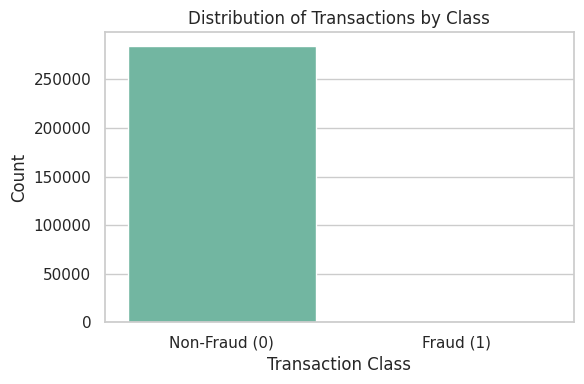

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Distribution of Transactions by Class')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.xlabel('Transaction Class')
plt.tight_layout()
plt.show()


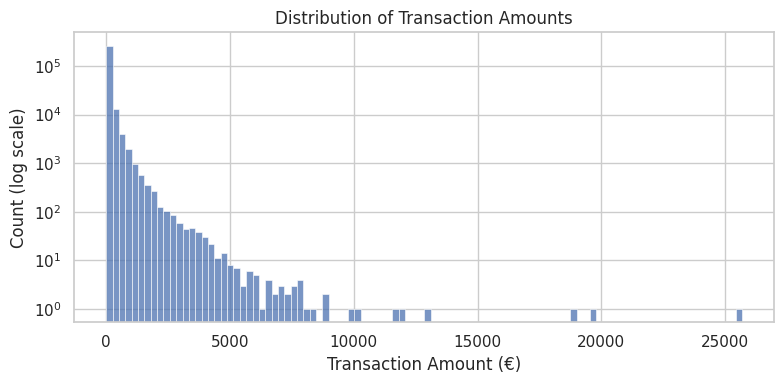

In [37]:
# Transaction Amount Distribution (log-scaled)
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100)
plt.yscale('log')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (€)')
plt.ylabel('Count (log scale)')
plt.tight_layout()
plt.show()


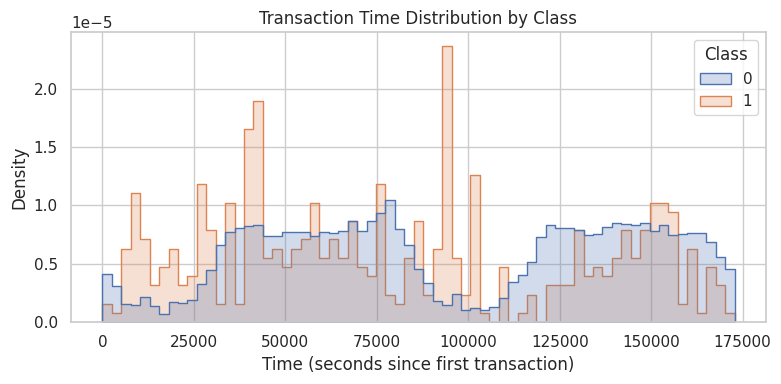

In [38]:
# Time of transaction vs Class
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Time', hue='Class', element='step', stat='density', common_norm=False)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


Data preprocessing


In [39]:
df.drop_duplicates(inplace=True)
duplicate_count = df.duplicated().sum()
print(f"Duplicate records: {duplicate_count}")

Duplicate records: 0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])


In [41]:
print(df.shape)

(283726, 32)


In [42]:
# Drop rows where 'Class' is missing
df = df.dropna(subset=['Class'])

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:

from sklearn.model_selection import train_test_split

# Assume df is your preprocessed DataFrame
# X = Features (all columns except 'Class'), y = Target ('Class')
X = df.drop('Class', axis=1)
y = df['Class']

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures same class distribution
)

# Check the shape of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (226980, 31) (226980,)
Testing set: (56746, 31) (56746,)


Code Implemenataion

In [44]:
# Importing necessary Libraaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


Handeling class imbalance

In [45]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
MODEL TRAINING

In [46]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


Logistic Regression

Confusion Matrix:
 [[56095   556]
 [   14    81]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.13      0.85      0.22        95

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.61     56746
weighted avg       1.00      0.99      0.99     56746

ROC AUC Score: 0.9599760862678133


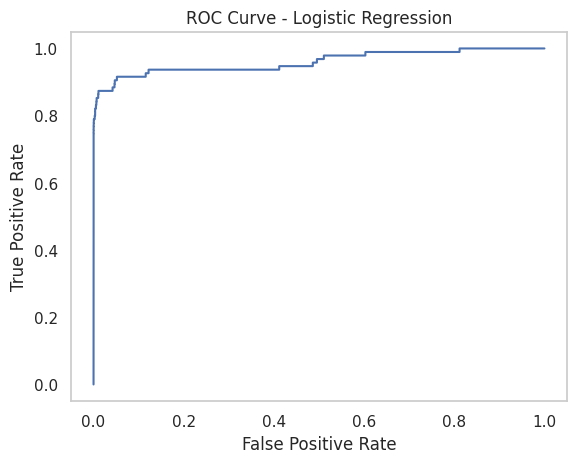

In [47]:
# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr)
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()


Decision Tree

Confusion Matrix:
 [[56560    91]
 [   27    68]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.43      0.72      0.54        95

    accuracy                           1.00     56746
   macro avg       0.71      0.86      0.77     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.8570915736146247


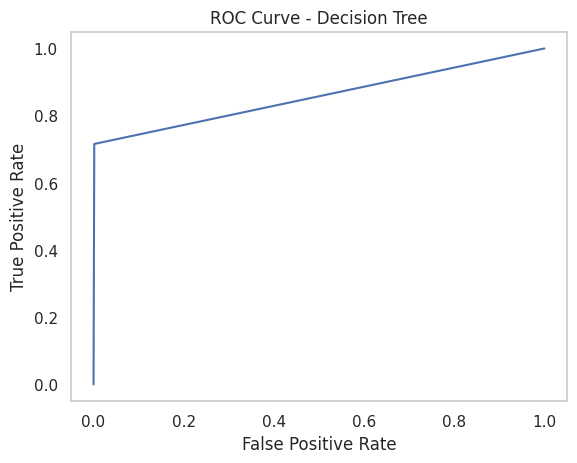

In [48]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr)
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost

Confusion Matrix:
 [[56636    15]
 [   19    76]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.80      0.82        95

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9659858282800787


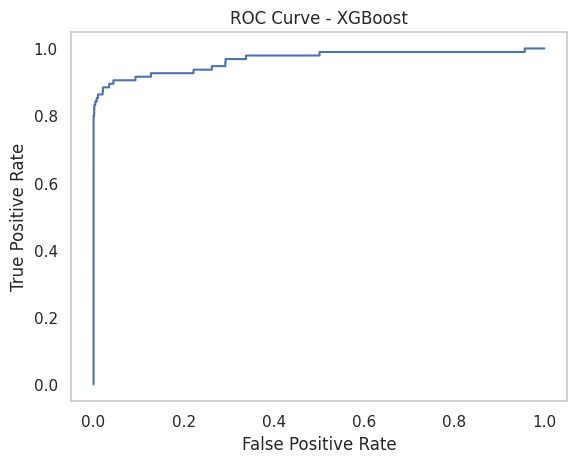

In [50]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr)
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

Random Forest

Confusion Matrix:
 [[56643     8]
 [   22    73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9749797699487813


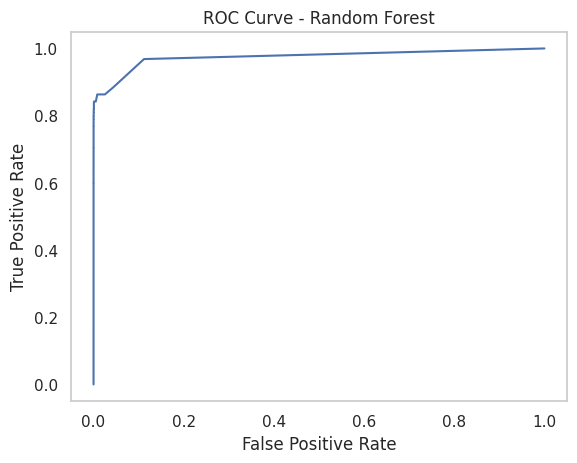

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr)
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()